In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGCCCACGGCGAGGCACTCTTGATCCCACCTTCAAGAGGT...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 65248.60it/s]


[24, 68, 163, 171, 175, 196, 186, 203, 224, 208, 227, 234, 247, 263, 280, 278, 297, 333, 318, 340, 358, 363, 389, 389, 417, 429, 441, 464, 486, 506, 542, 547, 582, 560, 596, 617, 631, 637, 649, 681, 690, 665, 738, 723, 726, 759, 750, 793, 789, 823, 838, 861, 873, 910, 932, 1591, 1578, 1572, 1540, 1537, 1546, 1475, 1440, 1446, 1476, 1443, 1383, 1361, 1405, 1352, 1352, 1330, 1316, 1316, 1281, 1300, 1281, 1244, 1264, 1231, 1221, 1206, 1185, 1180, 1159, 1128, 1097, 1128, 1123, 1097, 1065, 1058, 1064, 1080, 1044, 1031, 1026, 999, 1019, 1010, 960, 981, 976, 998, 928, 965, 938, 931, 912, 1341]


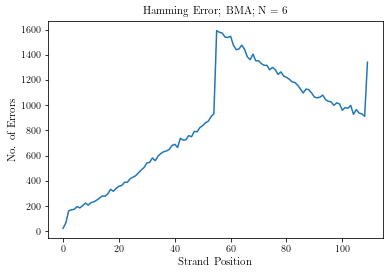

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-sab-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:04<00:00, 2212.37it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


AA ->  6
 -> CTT 6
TT -> G 6
GT -> C 7
T -> AC 7
 -> CTA 7
CTG ->  8
TC -> AA 8
CT -> A 8
CG -> A 9
T -> GA 9
T -> CA 10
TC -> A 10
G -> AC 10
TTG ->  11
 -> TG 11
AC ->  11
TG -> A 11
 -> CT 15
GG ->  17
 -> GC 18
CA ->  18
 -> GG 19
 -> TC 20
CG ->  23
A -> T 24
 -> CG 24
 -> GT 24
 -> GA 24
AT ->  25
GA ->  25
 -> AT 26
 -> CC 26
 -> TT 27
G -> T 27
AG ->  28
 -> TA 29
TC ->  29
A -> G 30
TA ->  32
CT ->  33
 -> AC 35
 -> AG 37
TT ->  37
GC ->  37
GT ->  43
TG ->  44
 -> AA 44
A -> C 46
 -> CA 48
C -> G 51
C -> T 58
G -> C 225
G -> A 253
T -> G 299
C -> A 326
T -> C 334
T -> A 345
C ->  473
 -> T 562
A ->  586
 -> G 645
 -> C 687
T ->  836
 -> A 905
G ->  1128


C -> A @ 40 6
T ->  @ 52 6
T ->  @ 28 6
 -> A @ 66 6
G -> C @ 54 6
 -> A @ 64 6
T ->  @ 63 6
T ->  @ 64 6
T ->  @ 103 6
T ->  @ 69 6
 -> C @ 61 6
 -> A @ 60 6
T ->  @ 48 6
 -> T @ 109 6
T ->  @ 31 6
T -> C @ 43 6
T -> C @ 39 6
 -> A @ 70 6
T -> G @ 62 6
T -> C @ 44 6
G ->  @ 22 6
G ->  @ 48 6
T ->  @ 19 6
T -> C @ 56 6
C ->  @ 69 6
T ->  @ 16 6
T ->  @ 43 6
 -> A @ 67 6
T ->  @ 46 6
T ->  @ 12 6
 -> C @ 14 6
C ->  @ 49 6
T -> C @ 61 6
T ->  @ 82 6
G ->  @ 15 6
 -> AG @ 54 6
G -> A @ 58 6
G ->  @ 44 6
G -> A @ 54 6
T ->  @ 9 6
G ->  @ 100 6
 -> A @ 51 6
 -> TG @ 55 6
G ->  @ 66 6
G -> A @ 48 6
 -> TC @ 54 6
 -> CC @ 54 6
G ->  @ 39 6
C -> A @ 67 6
T -> G @ 22 6
 -> T @ 52 6
G ->  @ 74 6
T -> A @ 67 6
 -> G @ 59 6
C ->  @ 46 6
C -> A @ 79 6
G ->  @ 72 6
G ->  @ 77 6
G ->  @ 36 6
T ->  @ 20 7
A -> T @ 110 7
T -> A @ 74 7
 -> GC @ 55 7
T ->  @ 107 7
T ->  @ 108 7
G ->  @ 59 7
C ->  @ 58 7
T -> G @ 66 7
C ->  @ 109 7
T ->  @ 26 7
G -> A @ 56 7
G -> A @ 80 7
T -> A @ 70 7
G ->  @ 35 7
T -> A

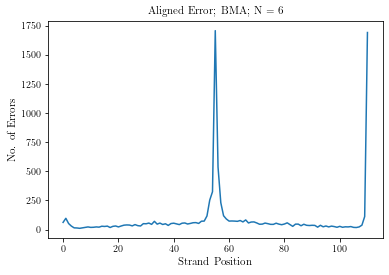

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-sab-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 1, 1, 0, 1, 2, 2, 5, 3, 2, 3, 2, 1, 2, 4, 6, 5, 1, 2, 5, 3, 2, 6, 5, 1, 5, 2, 2, 1, 8, 5, 5, 3, 8, 4, 7, 6, 4, 2, 6, 8, 5, 4, 4, 6, 5, 1, 3, 6, 5, 9, 3, 10, 8, 16, 60, 40, 25, 5, 7, 7, 7, 1, 2, 7, 4, 6, 1, 5, 5, 4, 2, 6, 5, 6, 0, 3, 6, 1, 5, 7, 3, 4, 4, 3, 4, 0, 5, 2, 5, 5, 3, 0, 3, 0, 4, 1, 4, 1, 4, 6, 2, 1, 1, 4, 3, 2, 4, 12, 13, 572]
[26, 39, 11, 1, 1, 1, 1, 0, 2, 2, 3, 3, 4, 3, 5, 4, 1, 1, 2, 1, 1, 4, 3, 2, 3, 5, 2, 2, 2, 2, 5, 5, 2, 4, 2, 9, 3, 3, 8, 0, 4, 1, 3, 2, 3, 3, 1, 5, 5, 3, 4, 6, 17, 38, 38, 293, 73, 27, 11, 4, 6, 4, 2, 7, 6, 3, 6, 6, 5, 7, 6, 1, 4, 1, 1, 0, 8, 5, 0, 3, 3, 9, 2, 3, 1, 4, 4, 5, 2, 3, 4, 4, 4, 4, 0, 1, 1, 1, 2, 1, 2, 2, 2, 3, 0, 2, 2, 1, 5, 26, 2]
[0, 18, 17, 15, 2, 2, 0, 1, 4, 6, 2, 5, 6, 1, 4, 3, 6, 4, 8, 6, 7, 4, 0, 10, 5, 2, 7, 4, 6, 4, 8, 6, 13, 13, 5, 3, 7, 5, 3, 8, 7, 9, 3, 6, 5, 9, 6, 4, 6, 4, 7, 8, 6, 8, 19, 36, 39, 19, 9, 8, 7, 9, 10, 6, 6, 7, 9, 10, 7, 6, 9, 5, 7, 9, 5, 8, 5, 5, 4, 1, 4, 4, 6, 2, 8, 4, 4, 7, 4, 8, 7, 2, 4, 5, 4, 3, 3, 5, 7, 2

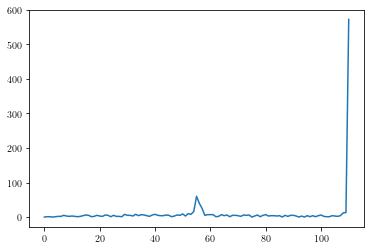

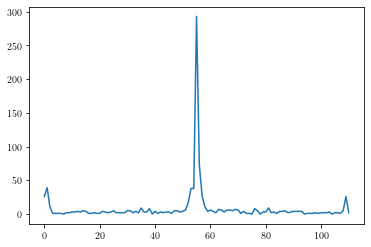

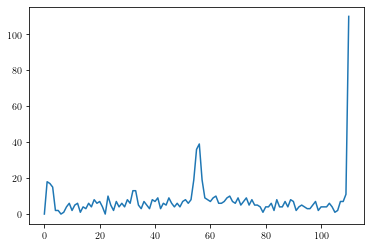

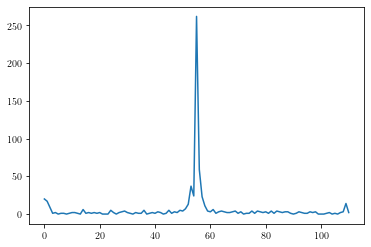

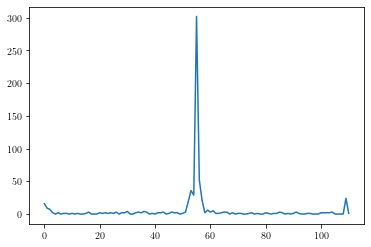

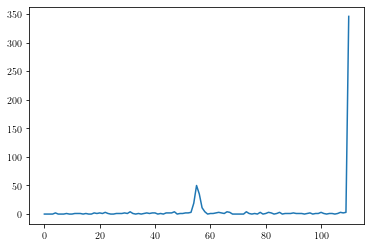

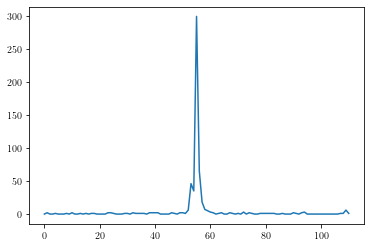

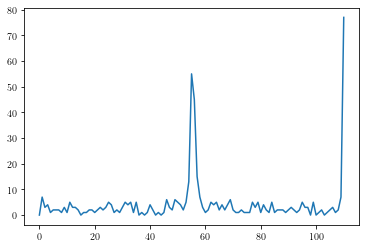

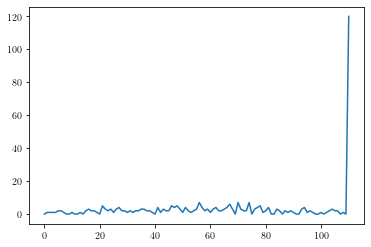

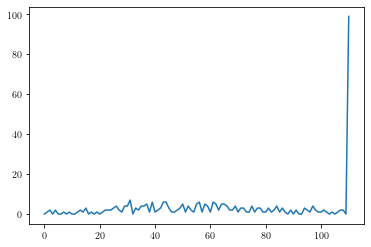

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)